In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5,figsize = (15,8), subplot_kw = {'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])
print("people.images.shape: {}" .format(people.images.shape))
print("Number of classes: {}" .format(len(people.target_names)))
#count how often each target appears
counts = np.bincount(people.target)
#print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}" .format(name, count), end=' ')
    if (i+1) % 3 == 0:
        print()
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

#scale the grayscale values to be between 0 and 1
#instead of 0 and 255 for better numeric stability
X_people = X_people / 255
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#split the data into training and test sets
X_train , X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
#build a KNeighborsClassifier using a one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

people.images.shape: (3023, 87, 65)
Number of classes: 62
Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 Jo

In [2]:
X_train_stand = (X_train - np.mean(X_train, axis = 0))/ np.std(X_train, axis = 0, ddof = 1)
X_test_stand = (X_test - np.mean(X_test, axis = 0))/ np.std(X_test, axis = 0, ddof = 1)
X_train_stand.shape, X_test_stand.shape

((1547, 5655), (516, 5655))

In [3]:
U, e, vT = np.linalg.svd(X_train_stand)

In [4]:
pc1 = vT.T[:,0]
pc2 = vT.T[:,1]
pc1.shape, pc2.shape


((5655,), (5655,))

In [5]:
pc1_projection = X_train_stand @ pc1
pc1_projection_max = np.argmax(pc1_projection)
pc1_projection_min = np.argmin(pc1_projection)
pc2_projection = X_train_stand @ pc2
pc2_projection_max = np.argmax(pc2_projection)
pc2_projection_min = np.argmin(pc2_projection)
pc1_projection_max

1014

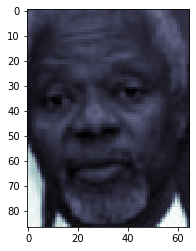

In [6]:
plt.imshow(X_train[pc1_projection_max,:].reshape(87, 65), cmap=plt.cm.bone)

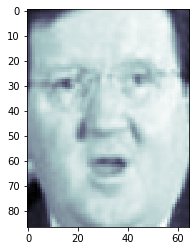

In [7]:
plt.imshow(X_train[pc1_projection_min,:].reshape(87, 65), cmap=plt.cm.bone)

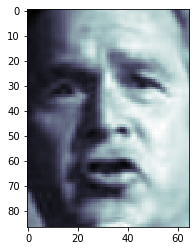

In [8]:
plt.imshow(X_train[pc2_projection_max,:].reshape(87, 65), cmap=plt.cm.bone)

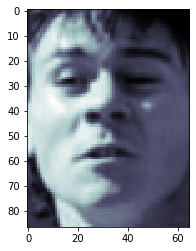

In [9]:
plt.imshow(X_train[pc2_projection_min,:].reshape(87, 65), cmap=plt.cm.bone)

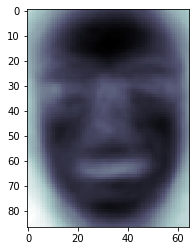

In [10]:
plt.imshow(pc1.reshape(87, 65), cmap=plt.cm.bone)

In [11]:
X_train_construction = X_train[0,:].dot(pc1)
X_train_reconstruction = X_train_construction * (pc1.T)
X_train_reconstruction.shape

(5655,)

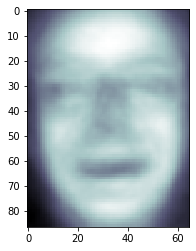

In [12]:
plt.imshow(X_train_reconstruction.reshape(87, 65), cmap=plt.cm.bone)

In [13]:
X_train_95 = e.size * 0.95
X_train_95

1469.6499999999999

In [14]:
W1500 = vT.T[:,:1500]
X_train_1500D = X_train_stand.dot(W1500)
X_train_reconstruct = X_train_1500D.dot(W1500.T)
X_train_1500D.shape, X_train.shape, X_train_reconstruct.shape

((1547, 1500), (1547, 5655), (1547, 5655))

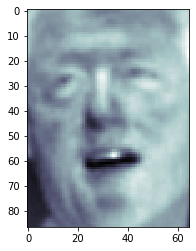

In [15]:
plt.imshow(X_train_reconstruct[0,:].reshape(87, 65), cmap=plt.cm.bone)

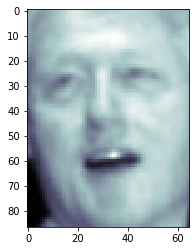

In [16]:
#Comparing the original Image
plt.imshow(X_train[0,:].reshape(87, 65), cmap=plt.cm.bone)